In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [66]:
bank =  pd.read_csv('C:\\Users\\DELL\\Desktop\\Machine Learning\\datasets\\bank.csv')
# Predict whether a person will deposit or not...
#bank = bank.rename(columns={"deposit":"target"})
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Dataset has 10 categorical & 7 numerical variables.

In [43]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [67]:
# Perform data analysis...
print('age: ',bank.age.unique())
print(bank.age.value_counts())

age:  [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
31    496
32    477
34    466
33    464
35    461
30    456
36    432
37    370
38    353
39    343
29    328
40    326
41    299
42    295
28    292
46    258
47    255
45    253
43    249
27    246
49    241
44    238
26    235
48    214
52    205
53    204
55    197
51    194
50    194
54    187
     ... 
66     29
67     29
72     28
65     27
71     27
68     24
70     23
76     21
20     20
69     20
78     19
74     18
75     18
80     17
19     13
79     10
82     10
81      9
18      8
83      7
86      5
85      5
84      5
87      4
88      2
92      2
93      2
90      2
89      1
95      1
Name: age, Length: 76, dtype: int64


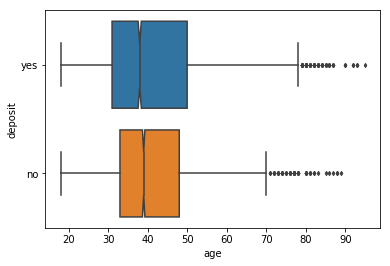

In [68]:
sns.boxplot(x=bank['age'], y=bank['deposit'],notch=True,fliersize=3.0)

### We should remove the outliers from age column, not every outlier should be removed (as our model will overfit ), but extreme outliers can be removed

In [82]:
bank['age'] = bank[bank['age']<85]
bank.dropna(inplace=True)
print('age: ',bank.age.unique())
bank['age']  = [int(i) for i in bank['age']]
bank.head()

age:  [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 71 21 74 65
 62 83 70 76 77 19 73 63 67 20 78 72 64 79 82 18 84 81 80]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [45]:
print('job: ',bank.job.unique())
# admin value contains a point at end, removing it...... 
# Also combine similar job types....
bank['job'] = bank.job.apply(lambda i: i.replace("admin.","admin"))
print(bank.job.value_counts())
print()
bank['job'] = bank['job'].replace(['management', 'admin'], 'admin')
bank['job'] = bank['job'].replace(['services','housemaid'], 'services')
bank['job'] = bank['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')
print(bank.job.value_counts())

job:  ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
management       2566
blue-collar      1944
technician       1823
admin            1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

admin            3900
blue-collar      1944
technician       1823
other            1565
services         1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64


no     10947
yes      167
Name: default, dtype: int64
